In [239]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from numpy.polynomial.polynomial import polyfit

In [3]:
NumD = ([7,5,5,13,4,2,3,3,13,4,23,59,9,84,5,103])
Year = ([1980,1981,1981,1983,1986,1989,1989,1989,1998,1999,2001,2005,2007,2008,2010,2017])

https://www.wpc.ncep.noaa.gov/research/txhur.pdf
https://en.wikipedia.org/wiki/List_of_Texas_hurricanes_(1980%E2%80%93present)

Text(0.5, 1.0, 'Known Deaths From Tropical Storms in Texas')

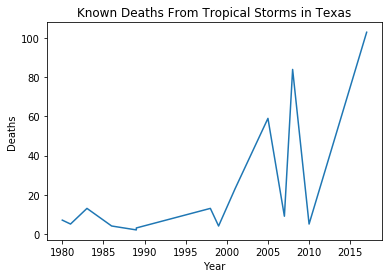

In [240]:
plt.plot(Year,NumD)
plt.ylabel('Deaths')
plt.xlabel('Year')
plt.title('Known Deaths From Tropical Storms in Texas')

In [15]:
data=pd.read_csv('Basin.NA.ibtracs_wmo.v03r10.csv')

In [16]:
storms = pd.DataFrame(data)

In [24]:
storms.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO),Center,Wind(WMO) Percentile,Pres(WMO) Percentile,Track_type
0,1851175N26270,1851,1,NA,GM,UNNAMED,1851-06-25 00:00:00,TS,28.0,-94.8,80.0,0.0,atcf,85.15,-100.0,main
1,1851175N26270,1851,1,NA,GM,UNNAMED,1851-06-25 06:00:00,TS,28.0,-95.4,80.0,0.0,atcf,85.15,-100.0,main
2,1851175N26270,1851,1,NA,GM,UNNAMED,1851-06-25 12:00:00,TS,28.0,-96.0,80.0,0.0,atcf,85.15,-100.0,main
3,1851175N26270,1851,1,NA,GM,UNNAMED,1851-06-25 18:00:00,TS,28.1,-96.5,80.0,0.0,atcf,85.15,-100.0,main
4,1851175N26270,1851,1,NA,GM,UNNAMED,1851-06-25 21:00:00,TS,28.2,-96.8,80.0,0.0,atcf,85.15,-100.0,main


In [70]:
for col in storms.columns:
    print(col)


Serial_Num
Season
Num
Basin
Sub_basin
Name
ISO_time
Nature
Latitude
Longitude
Wind(WMO)
Pres(WMO)
Center
Wind(WMO) Percentile
Pres(WMO) Percentile
Track_type


In [189]:
stormslat = storms[(storms['Latitude'] >= 25.0) & (storms['Latitude'] <= 32.0)]

In [190]:
stormslong = stormslat[(stormslat['Longitude'] >= -98.0) & (stormslat['Longitude'] <= -90.0)]

The above cells narrows the geographic window to a portion of the gulf of Mexico with Houston in the top left corner. The cell below goes back to the entire dataset as a control/reference.

In [207]:
stormsNA = storms[(storms['Season'] >= 1900) & (storms['Wind(WMO)'] >= 64)]

The cell above selects storms past a certain year and wind measured to 64 knots, the metric used to define a category 1 storm/hurricane

In [208]:
stormsNA.shape

(10707, 16)

In [209]:
stormsNA1 = stormsNA.groupby(['Serial_Num']).max()

The cell above groups the data by Storm, and its max reported wind speed.

In [212]:
stormsNA1.shape

(653, 15)

Text(0.5, 1.0, 'Storm intensity over the N.Atlantic')

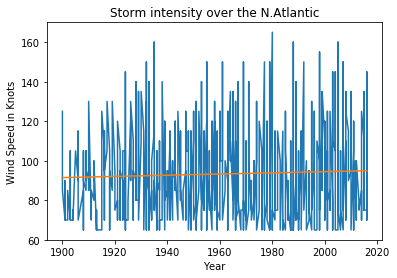

In [266]:
x = stormsNA1['Season']
y = stormsNA1['Wind(WMO)']
b, m = polyfit(x,y,1)
plt.plot(x,y)
plt.plot(x, b + m * x, '-')
plt.ylabel('Wind Speed in Knots')
plt.xlabel('Year')
plt.title('Storm intensity over the N.Atlantic')

In [267]:
b,m

(34.32536342376145, 0.030073683931458324)

Text(0.5, 1.0, 'Frequency of Cat 1+ Storms in the N.Atlantic')

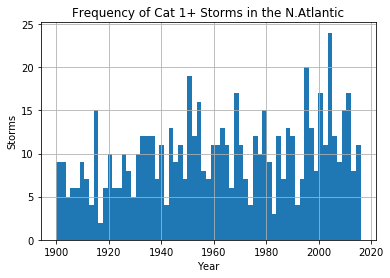

In [237]:
stormsNA1['Season'].hist(bins=65)
plt.ylabel('Storms')
plt.xlabel('Year')
plt.title('Frequency of Cat 1+ Storms in the N.Atlantic')


In [216]:
stormsGulf = stormslong[(stormslong['Season'] >= 1900) & (stormslong['Wind(WMO)'] >= 64)]

In [217]:
stormsGulf.shape

(399, 16)

In [224]:
stormsGulf1 = stormsGulf.groupby(['Serial_Num']).max()

In [228]:
stormsGulf1.shape

(75, 15)

Text(0.5, 1.0, 'Storm intensity over the Gulf & Texas')

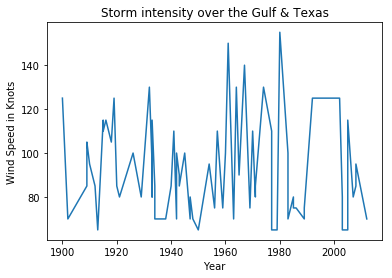

In [264]:
plt.plot(stormsGulf1['Season'],stormsGulf1['Wind(WMO)'],)
plt.ylabel('Wind Speed in Knots')
plt.xlabel('Year')
plt.title('Storm intensity over the Gulf & Texas')

Text(0.5, 1.0, 'Frequency of Cat 1+ Storms over the Gulf & Texas')

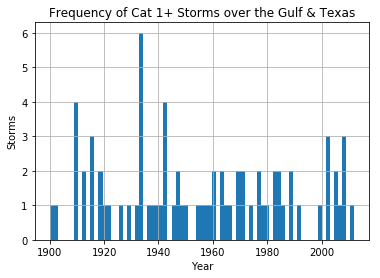

In [262]:
stormsGulf1['Season'].hist(bins=75)
plt.ylabel('Storms')
plt.xlabel('Year')
plt.title('Frequency of Cat 1+ Storms over the Gulf & Texas')

worldwide data displayed below for the curious

In [241]:
alldata=pd.read_csv('Allstorms.ibtracs_wmo.v03r10.csv')

In [242]:
allstorms = pd.DataFrame(alldata)

In [244]:
stormsglobal = allstorms[(allstorms['Season'] >= 1900) & (allstorms['Wind(WMO)'] >= 64)]

In [260]:
stormsglobaly = stormsglobal.groupby(['Serial_Num']).max()
stormsglobaly.shape

(2278, 15)

Text(0.5, 1.0, 'Storm Intensity Worldwide')

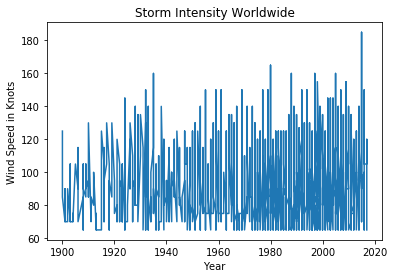

In [263]:
plt.plot(stormsglobaly['Season'],stormsglobaly['Wind(WMO)'],)
plt.ylabel('Wind Speed in Knots')
plt.xlabel('Year')
plt.title('Storm Intensity Worldwide')

Text(0.5, 1.0, 'Frequency of Cat 1+ Storms Worldwide')

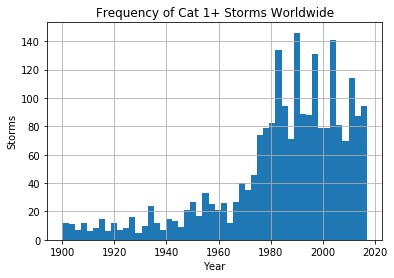

In [249]:
stormsglobaly['Season'].hist(bins=50)
plt.ylabel('Storms')
plt.xlabel('Year')
plt.title('Frequency of Cat 1+ Storms Worldwide')

There seems to be an a strong positive exponential trend. There could also be a large margin of error due to advances in weather tracking after the 60s